#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Luis Alfonso Sabanero Esquivel A01273286
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [9]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import learning_curve, validation_curve

#**Ejercicio-1.** 

In [2]:
df = pd.read_csv('SouthGermanCredit.asc', sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
df.rename(columns = {
    'laufkont':'status', #categorical
    'laufzeit':'duration', #quantitative
    'moral':'credit_history', #categorical
    'verw':'purpose', #categorical
    'hoehe':'amount', #quantitative
    'sparkont':'savings',#categorical
    'beszeit':'employment_duration', #ordinal
    'rate':'installment_rate', #ordinal
    'famges':'personal_status_sex', #categorical
    'buerge':'other_debtors', #categorical
    'wohnzeit':'present_residence', #ordinal
    'verm':'property', #ordinal
    'alter':'age', #quantitative
    'weitkred':'other_installment_plans', #categorical
    'wohn':'housing', #categorical
    'bishkred':'number_credits', #ordinal
    'beruf':'job', #ordinal
    'pers':'people_liable', #binary
    'telef':'telephone', #binary
    'gastarb':'foreign_worker', #binary
    'kredit':'credit_risk' #binary
}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

In [12]:
X=df.iloc[:,0:20] #Todas menos el credit_risk
y=df["credit_risk"] #Para la de salida

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)

#y_train.sum() / y_train.shape[0]
#Dataset desbalanceado verificar mas tarde

#**Ejercicio-3.**

In [14]:
#quantitative aka numerica 
categorical= ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
ordinal=['employment_duration','installment_rate','present_residence','property','number_credits','job']
quantitative=['duration','amount','age','property']
binary=['people_liable','telephone','foreign_worker']

In [15]:
#consultar actividad semana 2, se opta por transformar logaritmo porque deja la camapana de mejor forma
#categoricas aunque no estan vacias por precaucion aquellas vacias que se ponga la moda
#numericas que se rellene con la media de momento, minmax scaler para escalar todas al mismo rango
# Transformaciones a factores numéricos de entrada:
quantitative_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ('log',FunctionTransformer(np.log))])   
quantitative_pipeline_nombres = quantitative

# Transformaciones a factores categóricos de entrada:
categorical_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                ('OneHotE', OneHotEncoder(drop='first'))])  
categorical_pipeline_nombres = categorical

catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                           ('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = binary


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', quantitative_pipeline, quantitative_pipeline_nombres),
                                                        ('catimp', categorical_pipeline, categorical_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

In [16]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF - RANDOM FOREST:
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  
  return modelos, nombres

def mi_gmean(yreal, ypred):
  cm=confusion_matrix(yreal,ypred)
  recall=mi_recall(yreal, ypred)
  especifidad= cm[0][0] /(cm[0][0]+cm[0][1])
  gmean = np.sqrt(recall*especifidad)

  return gmean
  
def mi_recall(yreal, ypred):
  #VP/VP+FN
  cm = confusion_matrix(yreal, ypred) #Primero yreal, segundo pred
  VP=cm[1][1]
  FN=cm[1][0]

  return VP/(VP+FN)

def mi_f1(yreal, ypred):
  #2vp / 2vp+fp+fn
  cm = confusion_matrix(yreal, ypred)
  VP=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]
  return 2*VP/(2*VP+FN+FP)

In [19]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) #RANDOM STATE PARA DEBUGEAR 

  mismetricas =  {'F1':make_scorer(mi_f1), 'recall':make_scorer(mi_recall),'gmean':make_scorer(mi_gmean)}

  scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv)

  resultados.append(scores)

  print('%s:\nmean F1: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']), 
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),  
                                                                          ))

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR:
mean F1: 0.838 (0.0248)
mean Recall: 0.885 (0.0344)
Gmean: 0.629 (0.0543)

DT:
mean F1: 0.770 (0.0191)
mean Recall: 0.768 (0.0366)
Gmean: 0.584 (0.0546)

RF:
mean F1: 0.842 (0.0177)
mean Recall: 0.914 (0.0324)
Gmean: 0.586 (0.0526)



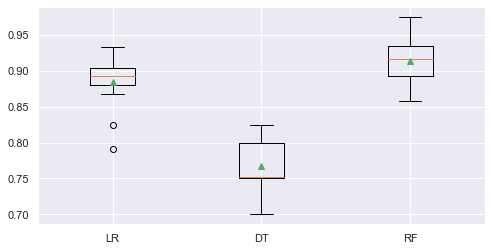

In [20]:
#Diagrama de caja
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**